In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\HP\Downloads\demo_data\demo_data\2.concerticcir1.csv",header=None)

In [3]:
data.head()

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [5]:
data.shape

(100, 3)

In [6]:
data.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,-0.010872,-0.019289,0.500000
std,0.577796,0.542785,0.502519
min,-1.131849,-1.289427,0.000000
25%,-0.450428,-0.433372,0.000000
50%,-0.030343,-0.030291,0.500000
75%,0.425418,0.420430,1.000000
max,1.129808,1.073060,1.000000


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[[0,1]],data[2],test_size=0.1,random_state=42)

In [10]:
X_train.shape,X_test.shape

((90, 2), (10, 2))

In [11]:
y_train.shape, y_test.shape

((90,), (10,))

In [12]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_tr = scale.fit_transform(X_train)
X_test_tr = scale.transform(X_test)

In [13]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [14]:
model = Sequential()

model.add(Dense(5,activation="relu",input_dim=2))

model.add(Dense(4,activation="relu"))

model.add(Dense(3,activation="relu"))

model.add(Dense(2,activation="relu"))


model.add(Dense(1,activation="sigmoid"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
 dense_3 (Dense)             (None, 2)                 8         
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [17]:
history = model.fit(X_train_tr,y_train,epochs=400,batch_size=12,validation_split=0.2)

Epoch 1/400
6/6 [==============================] - 1s 35ms/step - loss: 0.6826 - accuracy: 0.4861 - val_loss: 0.6826 - val_accuracy: 0.7222
Epoch 2/400
6/6 [==============================] - 0s 7ms/step - loss: 0.6816 - accuracy: 0.5694 - val_loss: 0.6827 - val_accuracy: 0.7222
Epoch 3/400
6/6 [==============================] - 0s 6ms/step - loss: 0.6810 - accuracy: 0.5972 - val_loss: 0.6826 - val_accuracy: 0.7778
Epoch 4/400
6/6 [==============================] - 0s 7ms/step - loss: 0.6804 - accuracy: 0.6111 - val_loss: 0.6825 - val_accuracy: 0.7778
Epoch 5/400
6/6 [==============================] - 0s 7ms/step - loss: 0.6797 - accuracy: 0.6250 - val_loss: 0.6826 - val_accuracy: 0.7222
Epoch 6/400
6/6 [==============================] - 0s 8ms/step - loss: 0.6792 - accuracy: 0.5972 - val_loss: 0.6825 - val_accuracy: 0.7222
Epoch 7/400
6/6 [==============================] - 0s 9ms/step - loss: 0.6786 - accuracy: 0.6111 - val_loss: 0.6825 - val_accuracy: 0.7222
Epoch 8/400
6/6 [=========

In [18]:
y_cap=model.predict(X_test_tr)

1/1 [==============================] - 0s 243ms/step


In [19]:
y_capf=np.where(y_cap>0.5,1,0)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

1.0

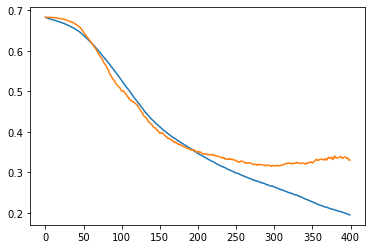

In [21]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [22]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 5s 1ms/step


<AxesSubplot:>

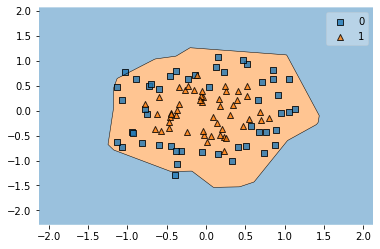

In [23]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

In [24]:
y_capf

array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]])

3888/3888 [==============================] - 4s 1ms/step


<AxesSubplot:>

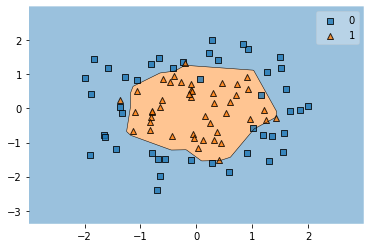

In [25]:
plot_decision_regions(X_train_tr,y_train.values.astype(int),clf=model)

7776/7776 [==============================] - 10s 1ms/step


<AxesSubplot:>

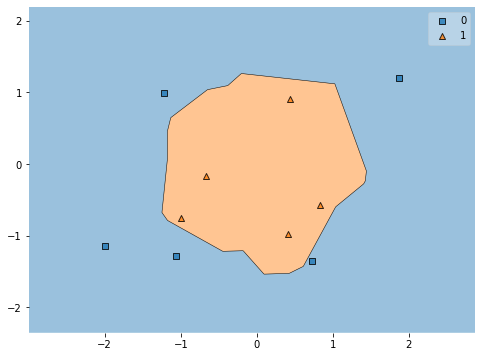

In [26]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_test_tr,y_test.values.astype(int),clf=model)